<a href="https://colab.research.google.com/github/nathancomley/ASSIGNMENT-2/blob/main/ASSESMENT_2_(TEST_PAD)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-28 07:52:40--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-28 07:52:41--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  42.0MB/s    in 23s     

2022-05-28 07:53:04 (36.0 MB/s) - ‘enron.db’ saved [853819392/853819392]



In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect("enron.db")

In [4]:
cur = conn.cursor()

In [5]:
import pandas as pd

#Just testing some queries to see if It works

sql='''
SELECT * from Employeelist;
'''
# Load the data into a DataFrame
Employeelist_df = pd.read_sql_query(sql,conn)
Employeelist_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [6]:
# New Query for the number of messages that were sent to/from Enron employees by date.

sql='''
   SELECT date(date) AS date_sent, count(mid) AS message_count
   FROM message
   GROUP BY date_sent
   ORDER BY date_sent;
'''
# Load the data into a DataFrame
NewCountByDate_df = pd.read_sql_query(sql,conn)
NewCountByDate_df


,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


In [ ]:
# query for number of emails for each employee.

sql= '''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count;
 '''

# Load the data into a DataFrame
NumberOfEmailsPerEmployee_df = pd.read_sql_query(sql,conn)
NumberOfEmailsPerEmployee_df

,sender,message_count
0,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
1,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
2,0_19812_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
3,1.11176403.-3@multexinvestornetwork.com,1
4,1.11176403.999@multexinvestornetwork.com,1
...,...,...
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838


In [ ]:
#This code works to show the Top Ten email senders.

top10_df = NumberOfEmailsPerEmployee_df.tail(10)
top10_df

,sender,message_count
17517,debra.perlingiere@enron.com,2549
17518,matthew.lenhart@enron.com,2784
17519,enron.announcements@enron.com,2838
17520,no.address@enron.com,3511
17521,chris.germany@enron.com,3686
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838
17526,jeff.dasovich@enron.com,6273


In [ ]:
#Testing to see if the dataframe has loaded and saved

print(top10_df)

                              sender  message_count
17517    debra.perlingiere@enron.com           2549
17518      matthew.lenhart@enron.com           2784
17519  enron.announcements@enron.com           2838
17520           no.address@enron.com           3511
17521        chris.germany@enron.com           3686
17522           tana.jones@enron.com           4437
17523      sara.shackleton@enron.com           4797
17524             kay.mann@enron.com           5100
17525           j.kaminski@enron.com           5838
17526        jeff.dasovich@enron.com           6273


In [ ]:
#Now for Plotting

#what do I need to plot?
#-1. number of messages each day by date. The dataframe that will be plotted is : CountByDate_df 
#-2. who are the top ten emailers of the organisation. The dataframe that will be plotted is : top10_df  

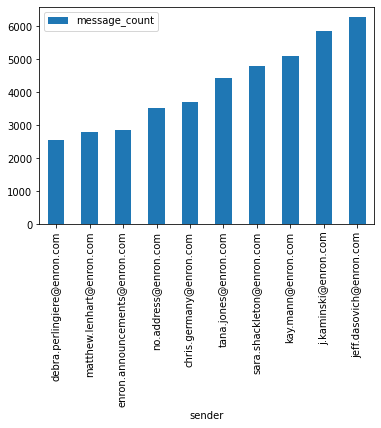

In [ ]:
#Plotting top 10 senders with pandas

top10_df.plot(x ='sender', y='message_count', kind = 'bar')

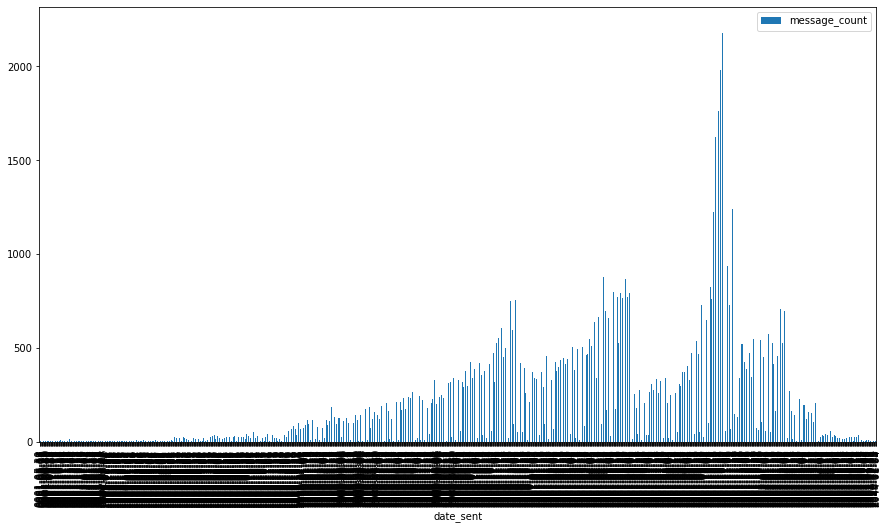

In [ ]:
#plotting the number of messages each day by date with pandas

from matplotlib import pyplot as plt

NewCountByDate_df.plot(x ='date_sent', y='message_count', kind = 'bar')

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]





Text(0, 0.5, 'Message Count')

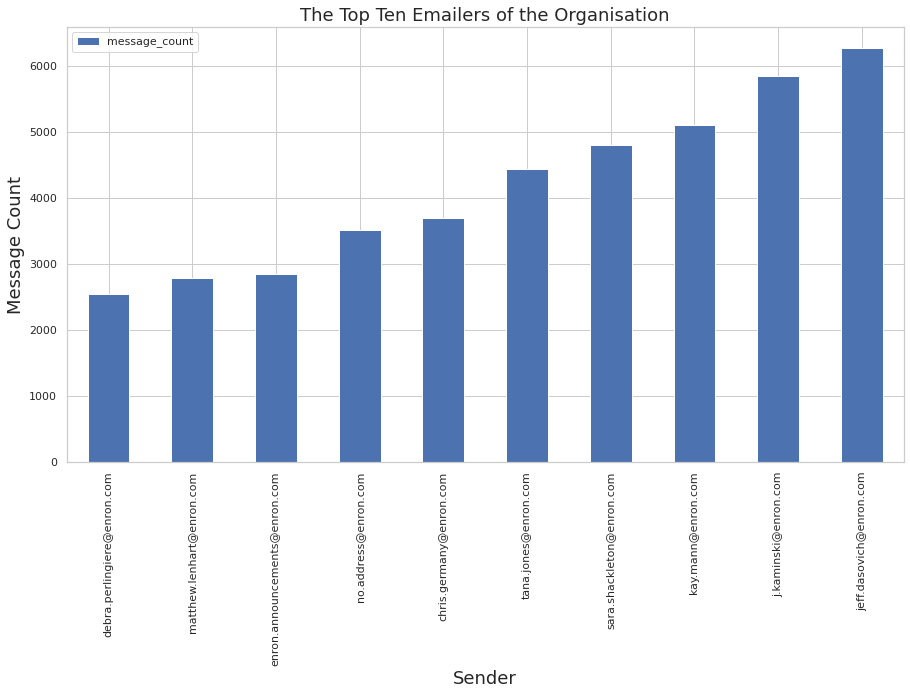

In [ ]:
#Plotting top 10 senders with pandas (TRYING TO MAKE IT BETTER) info used from
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#bar-charts-the-king-of-plots
# https://www.sidmartinbio.org/how-do-i-change-the-label-size-in-matplotlib/#How_do_I_change_the_label_size_in_Matplotlib

from matplotlib import pyplot as plt

#trying new styles
import seaborn as sns
sns.set_theme(style="whitegrid")

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]

#Plotting the data
top10_df.plot(x ='sender', y='message_count', kind = 'bar')

#Labeling the axis, and changing their font size.
plt.title("The Top Ten Emailers of the Organisation", fontsize = 18)
plt.xlabel("Sender", fontsize = 18)
plt.ylabel("Message Count", fontsize = 18)



Text(0, 0.5, 'Message Count')

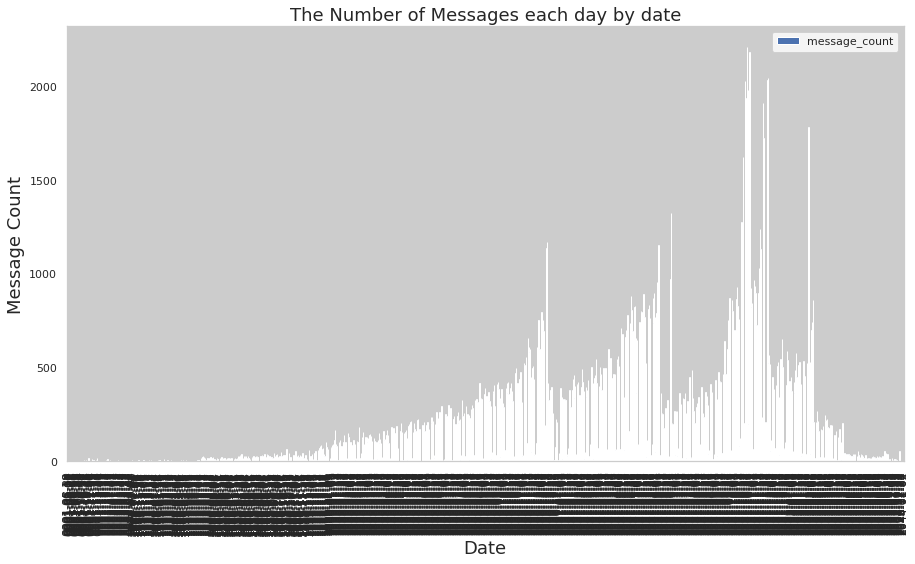

In [ ]:
# Trying to improve the 'number of messages each day by date' graph

from matplotlib import pyplot as plt

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]

#Plotting the data
CountByDate_df.plot(x ='date_sent', y='message_count', kind = 'bar')

#Labeling the axis, and changing their font size.
plt.title("The Number of Messages each day by date", fontsize = 18)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Message Count", fontsize = 18)


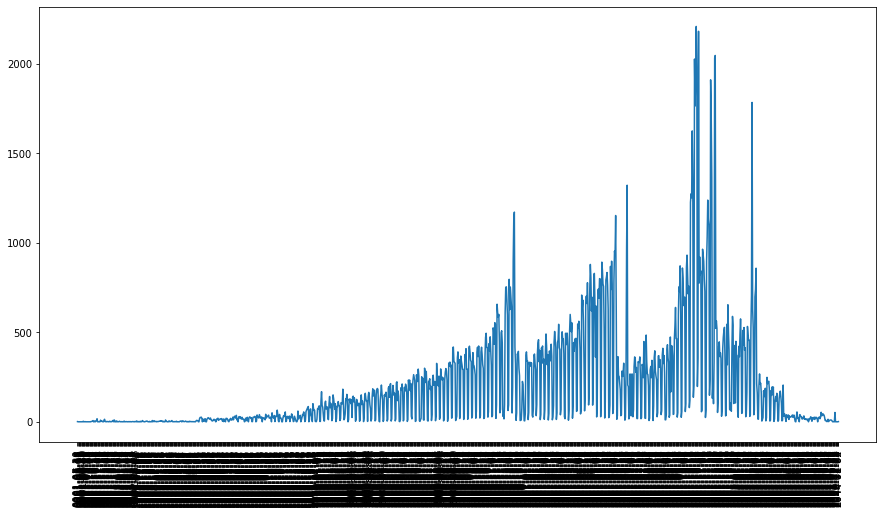

In [ ]:
#plotting the number of messages each day by date with pandas

from matplotlib import pyplot as plt

df = NewCountByDate_df.sort_values('date_sent', ascending=True)
plt.plot(df['date_sent'], df['message_count'])
plt.xticks(rotation='vertical')


#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]


Text(0, 0.5, ' Number of Messages')

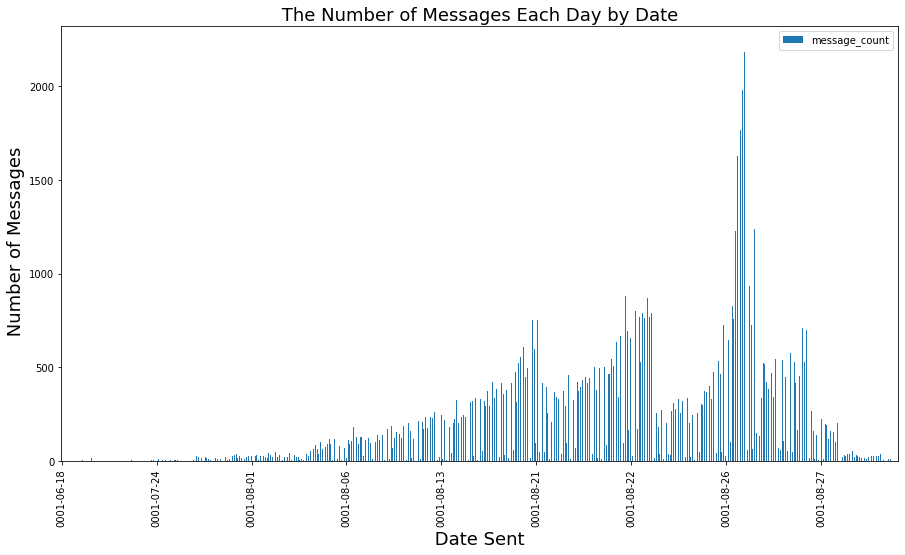

In [16]:
#plotting the number of messages each day by date with pandas

from matplotlib import pyplot as plt

ax = NewCountByDate_df.plot(x = 'date_sent', y = 'message_count', kind='bar')

ax.xaxis.set_major_locator(plt.MaxNLocator(10))

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]

#Labeling the axis, and changing their font size.
plt.title(" The Number of Messages Each Day by Date ", fontsize = 18)
plt.xlabel(" Date Sent ", fontsize = 18)
plt.ylabel(" Number of Messages", fontsize = 18)

Text(0, 0.5, ' Number of Messages')

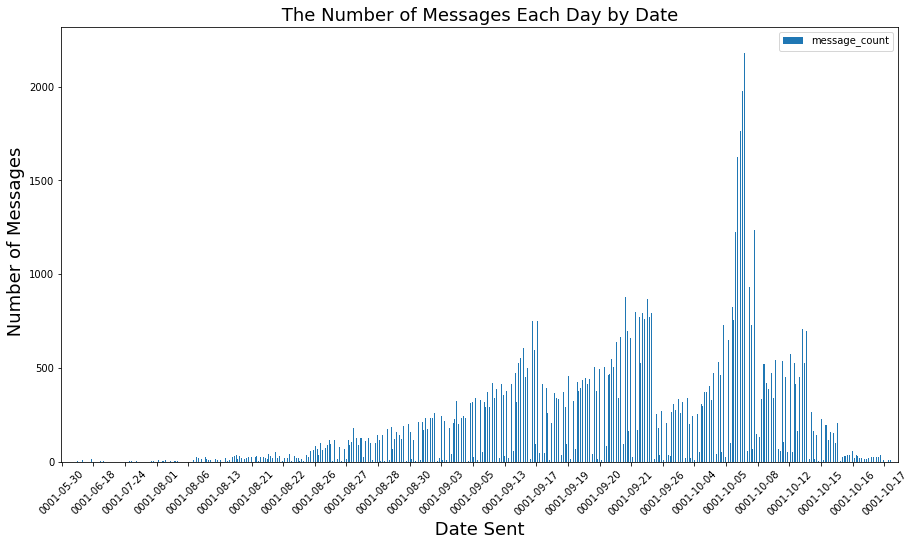

In [23]:
#plotting the number of messages each day by date with pandas

from matplotlib import pyplot as plt

NewCountByDate_df.plot(x = 'date_sent', y = 'message_count', kind='bar')

# setup tick range

start = 0

end = len(NewCountByDate_df['date_sent'])

steps = 50

 

# update the ticks on the plot

_ = plt.xticks(range(start, end, steps),rotation=45)

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]

#Labeling the axis, and changing their font size.
plt.title(" The Number of Messages Each Day by Date ", fontsize = 18)
plt.xlabel(" Date Sent ", fontsize = 18)
plt.ylabel(" Number of Messages", fontsize = 18)